## contains:
- Outlier handling
    - Using IQR Score
    - Using Z-Score (will be implimented once model training on first methos is done)

## Output:
- outliers removed dataframe( df_out1.csv )

# Import Libraries and data

In [22]:
# Import Libraries

import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [7]:
# import dataframe

df = pd.read_csv("data/df1.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,logS_aq_avg,ALogP,ALogp2,AMR,naAromAtom,nAromBond,nAtom,ATSm1,ATSm2,ATSm3,ATSm4,ATSm5,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,C1SP1,C2SP1,C1SP2,C2SP2,C3SP2,C1SP3,C2SP3,C3SP3,C4SP3,ECCEN,FMF,fragC,nHBAcc,nHBDon,HybRatio,Kier1,Kier2,Kier3,khs.sssB,khs.sCH3,khs.dCH2,khs.ssCH2,khs.tCH,khs.dsCH,khs.aaCH,khs.sssCH,khs.ddC,khs.tsC,khs.dssC,khs.aasC,khs.aaaC,khs.ssssC,khs.sNH2,khs.dNH,khs.ssNH,khs.aaNH,khs.tN,khs.dsN,khs.aaN,khs.sssN,khs.ddsN,khs.aasN,khs.sOH,khs.dO,khs.ssO,khs.aaO,khs.sF,khs.sssP,khs.dsssP,khs.sSH,khs.dS,khs.ssS,khs.aaS,khs.dssS,khs.ddssS,khs.sCl,khs.sBr,khs.sI,nAtomLC,nAtomP,nAtomLAC,MDEC.11,MDEC.12,MDEC.13,MDEC.14,MDEC.22,MDEC.23,MDEC.24,MDEC.33,MDEC.34,MDEC.44,MDEO.11,MDEO.12,MDEO.22,MDEN.11,MDEN.12,MDEN.13,MDEN.22,MDEN.23,MDEN.33,MLogP,PetitjeanNumber,topoShape,nRotB,LipinskiFailures,TopoPSA,VAdjMat,MW,WTPT.1,WTPT.2,WTPT.3,WTPT.4,WTPT.5,WPATH,WPOL,XLogP,Zagreb
0,-1.15,1.6128,2.601124,36.7388,0.0,0.0,21.0,10.548938,8.664184,10.438653,6.664184,5.664184,346.449760,335.495801,339.281645,237.122297,183.292346,8.0,0,0,1.0,2.0,0.0,2.0,1.0,1.0,0,76.0,0.0,328.02,2.0,1.0,0.571429,9.0,4.839506,8.000000,0,2.0,0,1.0,0,2.0,0.0,1.0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,7.0,2.0,6.0,0.500000,2.080084,1.788854,0.0,2.381102,3.301927,0.0,0.250000,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01,0.500000,1.000000,3.0,0,37.3,4.0,128.169250,16.498300,1.833144,4.749993,4.749993,0.0,108.0,6.0,2.057,34.0
1,-1.92,2.0167,4.067079,35.9129,0.0,0.0,23.0,10.548938,8.996276,9.770745,8.328368,6.996276,303.863246,286.834158,275.195845,232.239453,186.970253,8.0,0,0,1.0,0.0,0.0,3.0,3.0,0.0,0,83.0,0.0,412.02,2.0,0.0,0.857143,9.0,6.125000,5.877551,0,2.0,0,4.0,0,0.0,0.0,0.0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,8.0,3.0,4.0,0.142857,2.874433,0.577350,0.0,2.406852,2.149140,0.0,0.000000,0.0,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01,0.428571,0.750000,5.0,0,26.3,4.0,130.185132,16.655024,1.850558,5.348035,5.348035,0.0,108.0,7.0,1.844,32.0
2,-0.22,0.3936,0.154921,30.9848,0.0,0.0,14.0,55.355967,14.981043,24.182657,30.704995,23.052319,364.987639,371.116808,409.234033,302.431889,173.784840,8.0,0,0,2.0,0.0,0.0,0.0,2.0,0.0,0,63.0,0.0,97.05,4.0,2.0,0.500000,9.0,3.920000,4.500000,0,0.0,0,1.0,0,0.0,0.0,1.0,0,0,2.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,1,0,6.0,3.0,4.0,0.000000,0.000000,0.000000,0.0,0.000000,2.381102,0.0,1.650964,0.0,0.0,1.628651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.35,0.400000,0.666667,3.0,0,74.6,4.0,196.983795,16.327527,1.814170,11.893467,9.458406,0.0,96.0,8.0,-0.095,36.0
3,-0.23,0.0671,0.004502,27.9149,0.0,0.0,15.0,12.097876,9.328368,12.877306,9.992552,7.992552,283.041292,286.586007,321.633016,239.861731,144.940931,8.0,0,0,3.0,0.0,1.0,0.0,1.0,0.0,0,63.0,0.0,124.04,4.0,2.0,0.200000,9.0,3.920000,4.500000,0,0.0,1,1.0,0,0.0,0.0,0.0,0,0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,6.0,5.0,4.0,0.000000,0.500000,1.650964,0.0,0.000000,2.381102,0.0,1.650964,0.0,0.0,1.628651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.57,0.400000,0.666667,3.0,0,74.6,4.0,130.098944,16.327527,1.814170,9.458406,9.458406,0.0,96.0,8.0,-0.406,36.0
4,-4.23,2.9480,8.690704,45.0132,0.0,0.0,10.0,47.564750,17.758853,31.375344,50.610653,34.994162,690.236165,712.716278,807.763889,674.001616,345.217577,8.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,0,61.0,0.0,9.05,0.0,0.0,0.000000,9.0,3.920000,2.880000,0,0.0,0,0.0,0,1.0,0.0,0.0,0,0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,5.0,0,0,6.0,4.0,4.0,0.000000,0.000000,0.000000,0.0,0.000000,1.650964,0.0,2.381102,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.35,0.400000,0.666667,1.0,0,0.0,4.0,226.315572,16.322301,1.813589,11.954832,0.000000,0.0,92.0,10.0,4.068,36.0


# Outliers handling

- The method of using Z scores for capping/ trimming the outliers is valid ONLY if the particular feature is normally distributed
- Since our data here is NOT normally distributed, we should use other techniques, one of which is this IQR method

## Method 1 : using IQR score

In [19]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [11]:
df.shape

(8987, 115)

In [14]:
df_cap = df.copy()

In [91]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.15)
        q3 = df[col].quantile(0.97)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [92]:
iqr_capping(df_cap, numeric_features, 10.5)

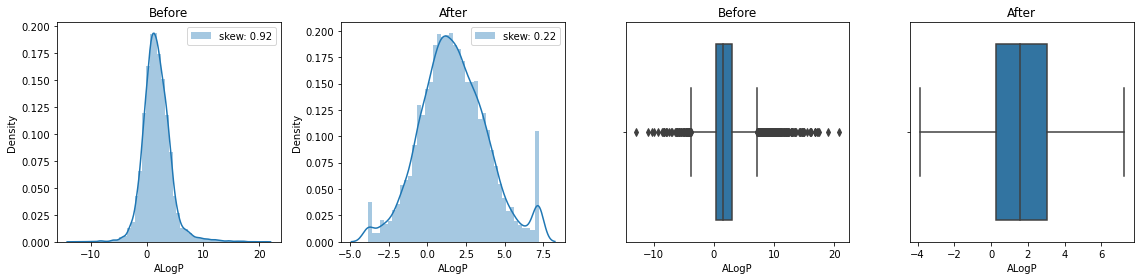

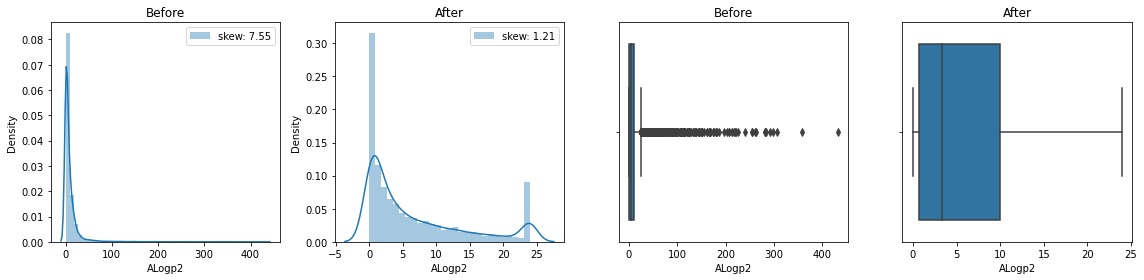

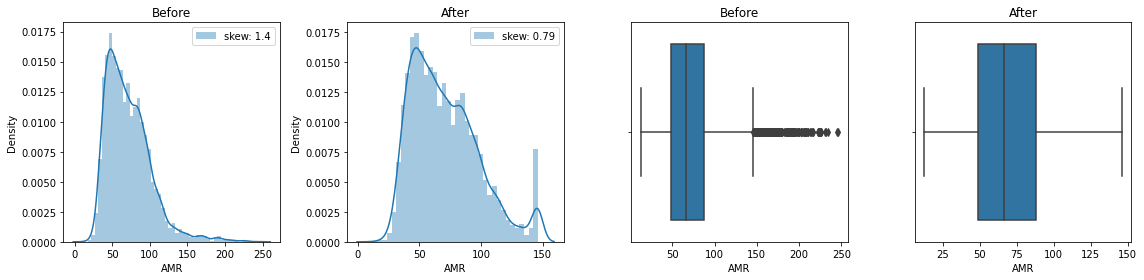

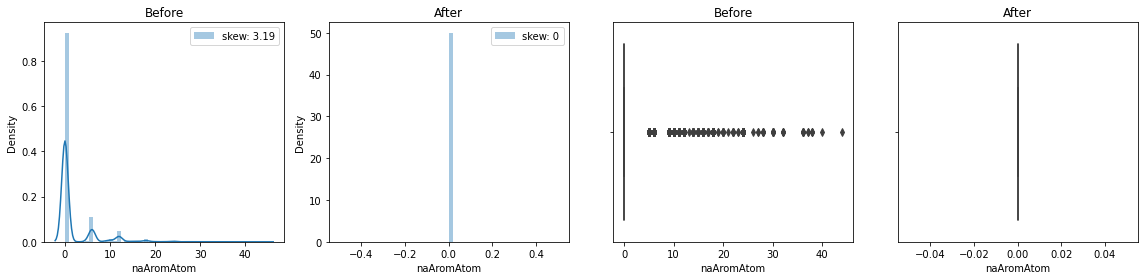

In [93]:
for col in numeric_features[1:5]:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [94]:
df_trim = df.copy()

def iqr_trimming(df, cols, factor):
    
    drop_outliers = np.array([])
    
    for col in cols:
        
        q1 = df[col].quantile(0.15)
        q3 = df[col].quantile(0.97)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        s = df[col]
        
        indexes = s[(s > upper_whisker) | (s< lower_whisker)].index
        
        drop_outliers = np.append(drop_outliers, indexes)
    
    return drop_outliers

dropped = np.unique(iqr_trimming(df_trim, numeric_features, 10.5))

df_trim.drop(dropped, inplace=True)

# data shape after removing outliers using IQR
df_trim.shape

(7688, 115)

In [95]:
# original data shape
df.shape

(8987, 115)

In [98]:
# save df
# df_trim.to_csv("data/df_out1.csv")

In [96]:
# Information Loss
print(f'{df.shape[0]- df_trim.shape[0]} rows removed out of {df.shape[0]}')

1299 rows removed out of 8987


<AxesSubplot:>

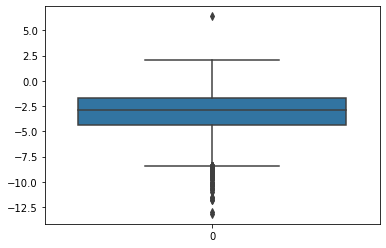

In [10]:
sns.boxplot(data=df["logS_aq_avg"])

In [ ]:
X = df.iloc[:,1:]      
y = df.iloc[:,:1]

#---perform a split---
random_state = 12
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size = 0.3,
                     shuffle = True,
                     random_state=random_state)
                     
#---train the model using Logistic Regression---
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)
#---evaluate the model---
log_reg.score(X_test,y_test)

## Method 2: Using Z-Score

this can be applied if we convert data to normal destribution